In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load CSV
df = pd.read_csv("/Users/jonasvyshniauskas/Desktop/SPICED/below_zero/jonas/delays.csv")

# 2️⃣ Clean column names (strip spaces)
df.columns = df.columns.str.strip()

# 3️⃣ Convert the date column to datetime
df["date"] = pd.to_datetime(df["date"])

# 4️⃣ Plot the time series
plt.figure(figsize=(14,6))
plt.plot(df["date"], df["flights"], marker="o", linestyle="-", color="steelblue")

# 5️⃣ Highlight Katrina landfall period
plt.axvspan(pd.to_datetime("2005-08-28"), pd.to_datetime("2005-09-05"),
            color="red", alpha=0.2, label="Katrina Impact")

# 6️⃣ Formatting
plt.title("Daily Flights at MSY (Jul–Sep 2005)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()



KeyError: 'date'

In [8]:
import pandas as pd

df = pd.read_csv("/Users/jonasvyshniauskas/Desktop/SPICED/below_zero/jonas/delays.csv")
print(df.columns.tolist())


['origin', 'month', 'day', 'flight_date', 'count']


In [9]:
df.columns = df.columns.str.strip()  # removes leading/trailing spaces
df["date"] = pd.to_datetime(df["date"])  # now this should work


KeyError: 'date'

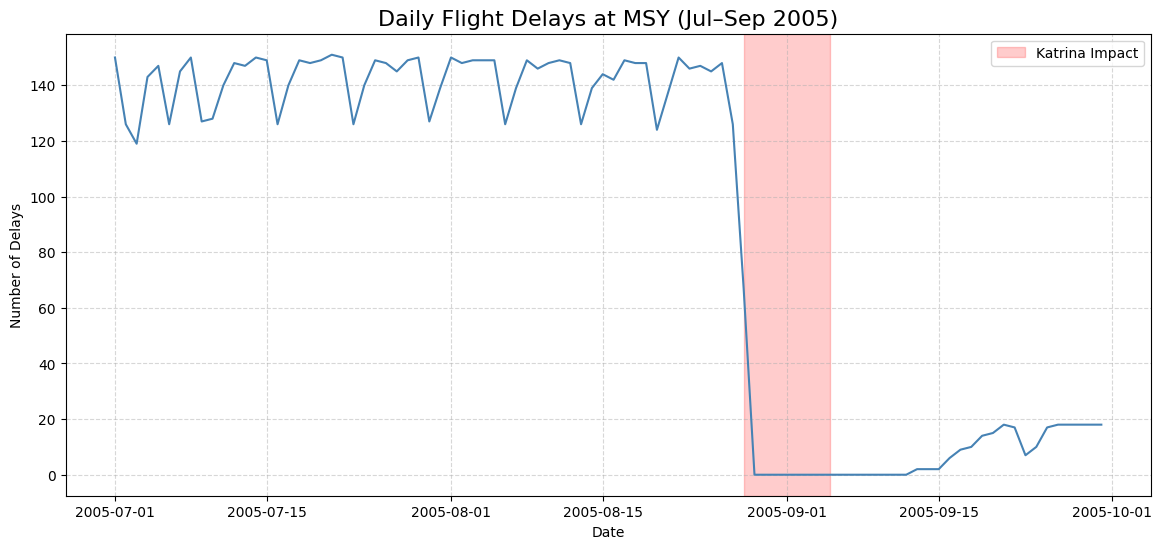

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load CSV, skip first row (original header)
df = pd.read_csv("/Users/jonasvyshniauskas/Desktop/SPICED/below_zero/jonas/delays.csv",
                 header=None, skiprows=1)

# 2️⃣ Assign proper column names
df.columns = ["airport", "month", "day", "date", "flights"]

# 3️⃣ Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# 4️⃣ Plot
plt.figure(figsize=(14,6))
plt.plot(df["date"], df["flights"], linestyle="-", color="steelblue")

# 5️⃣ Highlight Katrina period
plt.axvspan(pd.to_datetime("2005-08-28"), pd.to_datetime("2005-09-05"),
            color="red", alpha=0.2, label="Katrina Impact")

plt.title("Daily Flight Delays at MSY (Jul–Sep 2005)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Delays")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


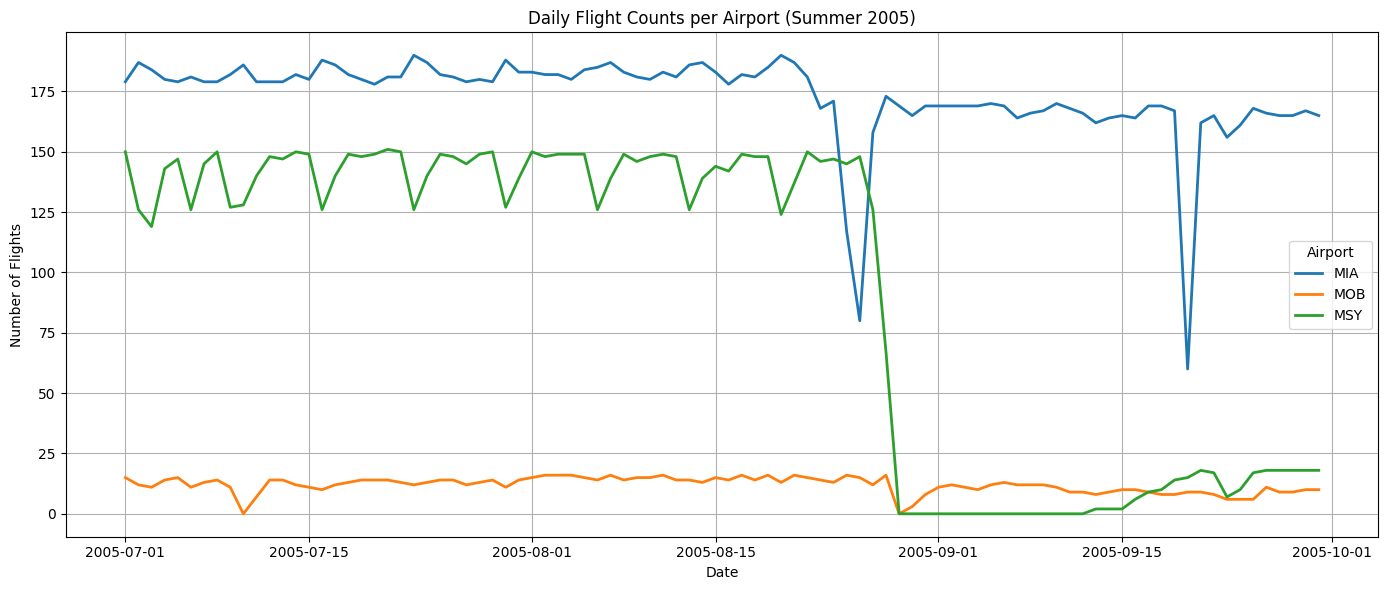

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load the CSV
df = pd.read_csv("delaysfull.csv")  # Replace with your CSV path

# 2️⃣ Convert the 'flight_date' column to datetime
df["flight_date"] = pd.to_datetime(df["flight_date"])

# 3️⃣ Plot
plt.figure(figsize=(14,6))

# Plot a line for each airport
for airport, group in df.groupby("origin"):
    plt.plot(group["flight_date"], group["count"], label=airport, linewidth=2)

# 4️⃣ Customize the plot
plt.title("Daily Flight Counts per Airport (Summer 2005)")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.legend(title="Airport")
plt.grid(True)
plt.tight_layout()

# 5️⃣ Show plot
plt.show()



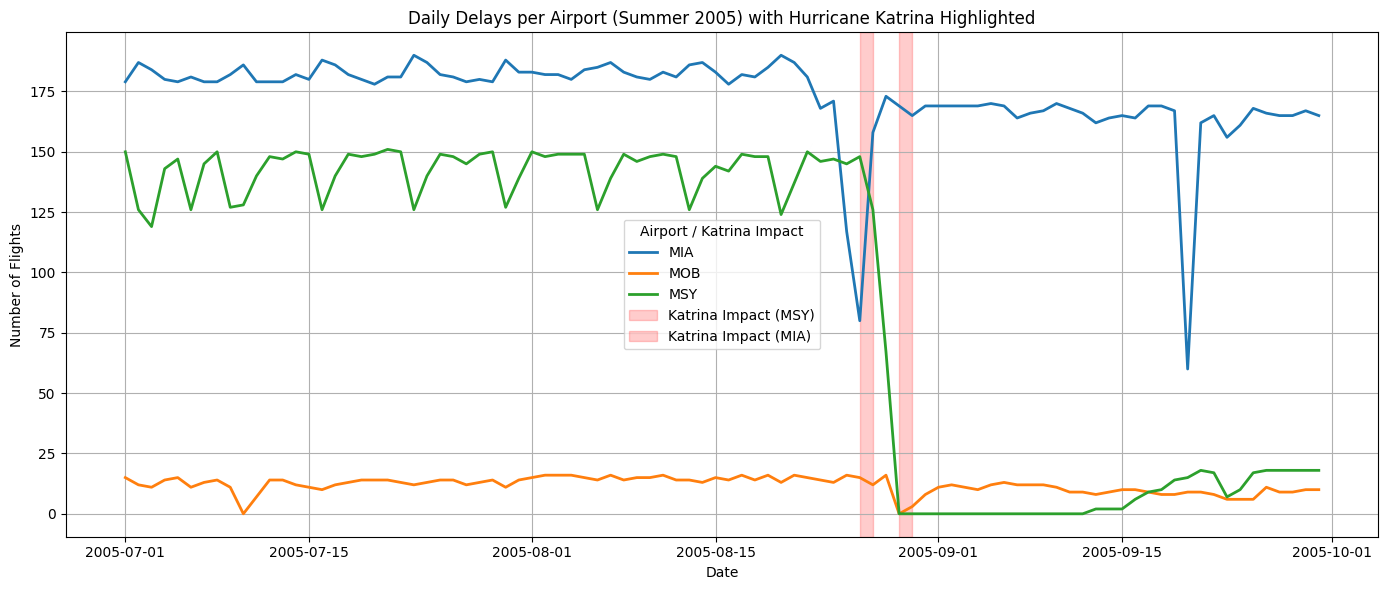

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Load the CSV
df = pd.read_csv("delaysfull.csv")  # Replace with your CSV path

# 2️⃣ Convert the 'flight_date' column to datetime
df["flight_date"] = pd.to_datetime(df["flight_date"])

# 3️⃣ Plot
plt.figure(figsize=(14,6))

# Plot a line for each airport
for airport, group in df.groupby("origin"):
    plt.plot(group["flight_date"], group["count"], label=airport, linewidth=2)

# 4️⃣ Highlight Katrina impact period
katrina_start_msy = pd.to_datetime("2005-08-29")
katrina_end_msy = pd.to_datetime("2005-08-30")
katrina_start_mia = pd.to_datetime("2005-08-26")
katrina_end_mia = pd.to_datetime("2005-08-27")

# Shade the period for New Orleans (MSY)
plt.axvspan(katrina_start_msy, katrina_end_msy, color="red", alpha=0.2, label="Katrina Impact (MSY)")

# Optionally, shade Miami separately (MIA) in a different color if needed
plt.axvspan(katrina_start_mia, katrina_end_mia, color="red", alpha=0.2, label="Katrina Impact (MIA)")

# 5️⃣ Customize the plot
plt.title("Daily Delays per Airport (Summer 2005) with Hurricane Katrina Highlighted")
plt.xlabel("Date")
plt.ylabel("Number of Flights")
plt.legend(title="Airport / Katrina Impact")
plt.grid(True)
plt.tight_layout()

# 6️⃣ Show plot
plt.show()
